In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('./ai4i2020.csv')

In [4]:
df.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
# 변수 컬럼명 변경
# 변수 단위 Air temperature (켈빈온도), Process temperature (켈빈온도), 
# Rotational speed (분당회전수), Torque (회전력/Nm:뉴턴미터) Tool wear (공구 마모 시간/분)
df.rename(columns={'Air temperature [K]':'Air temperature',
                   'Process temperature [K]':'Process temperature',
                   'Rotational speed [rpm]':'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'},inplace=True)
df.head(3)

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [8]:
# 불필요한 컬럼 (제품번호 등 제거) 
# process temp 은 ait temp 에 10도를 더한 값이나 분석에 필요할 것으로 생각되어 제거하지 않음 
df.drop(['UDI','Product ID'], axis=1, inplace=True)

In [9]:
df.head(3)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [10]:
# 온도 단위 변경 / 캘빈 -> 섭씨 / 소수점 1자리
df['Air temperature']=df['Air temperature'].apply(lambda x: x- 273.15).round(1)
df['Process temperature']=df['Process temperature'].apply(lambda x: x- 273.15).round(1)
df.head(3)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,25.0,35.5,1551,42.8,0,0,0,0,0,0,0
1,L,25.1,35.6,1408,46.3,3,0,0,0,0,0,0
2,L,25.0,35.4,1498,49.4,5,0,0,0,0,0,0


###failure 유,무 비교 (갯수, 평균, 합계) 


In [11]:
df.groupby('Machine failure').describe()

Air temperature                                               \
                          count       mean       std   min   25%   50%   75%   
Machine failure                                                                
0                        9661.0  26.863234  1.991327  22.2  25.2  26.9  28.4   
1                         339.0  27.771976  2.069605  22.5  26.0  28.5  29.4   

                      Process temperature             ...  OSF          RNF  \
                  max               count       mean  ...  75%  max   count   
Machine failure                                       ...                     
0                31.4              9661.0  36.884577  ...  0.0  0.0  9661.0   
1                31.2               339.0  37.178466  ...  1.0  1.0   339.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
Machine failure                                               
0                0.001863  0.043126  0.0  0.0  0.0  0.0  1.0  
1                0.002950  0.054313  0.0  0.0  0.0  0.0  1.0  

[2 rows x 80 columns]

In [12]:
#failure 없는 경우에 RNF 랜덤 failure 18 개 존재함 
df.groupby('Machine failure').sum()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
Machine failure,,,,,,,,,,
0,259525.7,356341.9,14880452,382862.1,1030768,0,0,0,0,18
1,9414.7,12603.5,507309,17007.0,48742,46,115,95,98,1


In [13]:
# RNF (random failures) 분석을 위해 데이터 생성함
df_RNF = df.groupby('Machine failure').get_group(0)
df_RNF.sum()

Type                   MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHML...
Air temperature                                                 259525.7
Process temperature                                             356341.9
Rotational speed                                                14880452
Torque                                                          382862.1
Tool wear                                                        1030768
Machine failure                                                        0
TWF                                                                    0
HDF                                                                    0
PWF                                                                    0
OSF                                                                    0
RNF                                                                   18
dtype: object

In [14]:
# failure 발생 건 데이터 분석을 위해 RNF 랜덤 데이터 컬럼 삭제
df.drop(['RNF'], axis= 1, inplace=True)

In [15]:
#failre 별 합계 컬럼 생성
df['failure Total'] = df['TWF'] +df['HDF'] + df['PWF'] + df['OSF'] 

In [16]:
df.head(3)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,failure Total
0,M,25.0,35.5,1551,42.8,0,0,0,0,0,0,0
1,L,25.1,35.6,1408,46.3,3,0,0,0,0,0,0
2,L,25.0,35.4,1498,49.4,5,0,0,0,0,0,0


In [17]:
df.groupby('Machine failure').sum()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,failure Total
Machine failure,,,,,,,,,,
0,259525.7,356341.9,14880452,382862.1,1030768,0,0,0,0,0
1,9414.7,12603.5,507309,17007.0,48742,46,115,95,98,354


### Machine failure 발생 데이터 분석

In [18]:
# Machine failure 발생 데이터 생성
df_failure =df.groupby('Machine failure')

In [19]:
df_failure.groups

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, ...], 1: [50, 69, 77, 160, 161, 168, 194, 207, 242, 248, 249, 259, 327, 380, 442, 463, 586, 603, 746, 847, 880, 903, 926, 1016, 1085, 1087, 1095, 1123, 1124, 1144, 1161, 1162, 1167, 1284, 1324, 1334, 1335, 1391, 1419, 1437, 1492, 1496, 1509, 1583, 1595, 1682, 1763, 1784, 1789, 1808, 1833, 1996, 2015, 2075, 2125, 2166, 2233, 2244, 2299, 2331, 2332, 2426, 2444, 2494, 2502, 2581, 2598, 2671, 2749, 2761, 2858, 2864, 2879, 2941, 3000, 3019, 3140, 3236, 3266, 3350, 3356, 3369, 3457, 3528, 3529, 3579, 3611, 3684, 3695, 3760, 3787, 3793, 3806, 3814, 3829, 3854, 3865, 3867, 3928, 3935, ...]}

In [20]:
# failure 없는 그룹 생성
df_fail_0=df_failure.get_group(0)

In [21]:
df_fail_0.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,failure Total
count,9661.000000,9661.000000,9661.000000,9661.000000,9661.000000,9661.0,9661.0,9661.0,9661.0,9661.0,9661.0
mean,26.863234,36.884577,1540.260014,39.629655,106.693717,0.0,0.0,0.0,0.0,0.0,0.0
std,1.991327,1.487241,167.394734,9.472080,62.945790,0.0,0.0,0.0,0.0,0.0,0.0
min,22.200000,32.600000,1168.000000,12.600000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,25.200000,35.700000,1429.000000,33.100000,52.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,26.900000,36.900000,1507.000000,39.900000,107.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,28.400000,38.000000,1615.000000,46.300000,160.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,31.400000,40.700000,2695.000000,70.000000,246.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# failure 있는 그룹 생성
df_fail_1=df_failure.get_group(1)

In [23]:
 df_fail_1.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,failure Total
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.0,339.000000,339.000000,339.000000,339.000000,339.000000
mean,27.771976,37.178466,1496.486726,50.168142,143.781711,1.0,0.135693,0.339233,0.280236,0.289086,1.044248
std,2.069605,1.362682,384.943547,16.374498,72.759876,0.0,0.342969,0.474149,0.449778,0.454008,0.318727
min,22.500000,33.000000,1181.000000,3.800000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,36.400000,1326.500000,45.950000,84.500000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,28.500000,37.200000,1365.000000,53.700000,165.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,29.400000,38.100000,1421.500000,61.200000,207.500000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000
max,31.200000,40.600000,2886.000000,76.600000,253.000000,1.0,1.000000,1.000000,1.000000,1.000000,3.000000


In [24]:
# failure Total 과 5가지 변수들의 상관 관계 분석
df_fail_1[['failure Total','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,failure Total,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
failure Total,1.000000,0.027002,-0.012786,-0.096897,0.240575,0.180429
Air temperature,0.027002,1.000000,0.847543,-0.142579,0.036247,-0.229198
Process temperature,-0.012786,0.847543,1.000000,-0.073515,0.014649,-0.103792
Rotational speed,-0.096897,-0.142579,-0.073515,1.000000,-0.879944,-0.108680
Torque,0.240575,0.036247,0.014649,-0.879944,1.000000,-0.021317
Tool wear,0.180429,-0.229198,-0.103792,-0.108680,-0.021317,1.000000


Text(0.5, 0, 'Torque')

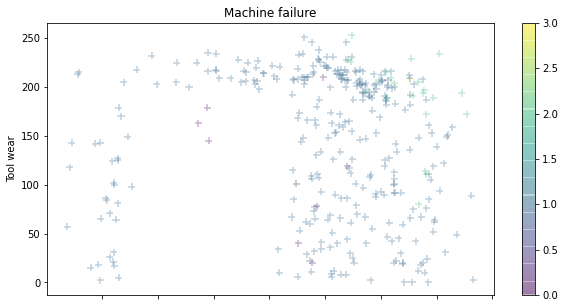

In [25]:
# 주요 요인 산점도 분석
failure_Total =  df_fail_1.TWF +df_fail_1.HDF + df_fail_1.PWF + df_fail_1.OSF  
df_fail_1.plot(kind='scatter', x='Torque', y='Tool wear', marker = '+', cmap = 'viridis', c=failure_Total, s=50, alpha=0.3, figsize=(10,5)) 
plt.title('Machine failure')
plt.xlabel('Torque')

In [26]:
# TWF(공구 마모 failure) 와 5가지 변수들의 상관 관계 분석 
# -> 회전수 와 양의 상관 관계 / 당연히 공구 마모 시간과 큰 영향
df_fail_1[['TWF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,TWF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
TWF,1.000000,-0.113002,-0.036143,0.071836,-0.298829,0.395875
Air temperature,-0.113002,1.000000,0.847543,-0.142579,0.036247,-0.229198
Process temperature,-0.036143,0.847543,1.000000,-0.073515,0.014649,-0.103792
Rotational speed,0.071836,-0.142579,-0.073515,1.000000,-0.879944,-0.108680
Torque,-0.298829,0.036247,0.014649,-0.879944,1.000000,-0.021317
Tool wear,0.395875,-0.229198,-0.103792,-0.108680,-0.021317,1.000000


In [27]:
# HDF(heat dissipation) 와 5가지 변수들의 상관 관계 분석 
# -> 공기 온도,  회전력에 영향  
df_fail_1[['HDF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,HDF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
HDF,1.000000,0.579242,0.260897,-0.296813,0.131416,-0.360862
Air temperature,0.579242,1.000000,0.847543,-0.142579,0.036247,-0.229198
Process temperature,0.260897,0.847543,1.000000,-0.073515,0.014649,-0.103792
Rotational speed,-0.296813,-0.142579,-0.073515,1.000000,-0.879944,-0.108680
Torque,0.131416,0.036247,0.014649,-0.879944,1.000000,-0.021317
Tool wear,-0.360862,-0.229198,-0.103792,-0.108680,-0.021317,1.000000


In [28]:
# PWF(power failure) 와 5가지 변수들의 상관 관계 분석 
# -> 회전수 와 양의 관계 회전력과는 상관없음
df_fail_1[['PWF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,PWF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
PWF,1.000000,-0.244850,-0.153765,0.434216,-0.063099,-0.359836
Air temperature,-0.244850,1.000000,0.847543,-0.142579,0.036247,-0.229198
Process temperature,-0.153765,0.847543,1.000000,-0.073515,0.014649,-0.103792
Rotational speed,0.434216,-0.142579,-0.073515,1.000000,-0.879944,-0.108680
Torque,-0.063099,0.036247,0.014649,-0.879944,1.000000,-0.021317
Tool wear,-0.359836,-0.229198,-0.103792,-0.108680,-0.021317,1.000000


In [29]:
# OSF(overstrain failure) 와 5가지 변수들의 상관 관계 분석 
# -> 회전력과 공구 마모 시간(TWF 0.395 보다 높음) 영향 
df_fail_1[['OSF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,OSF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
OSF,1.000000,-0.258048,-0.101811,-0.242481,0.319898,0.560967
Air temperature,-0.258048,1.000000,0.847543,-0.142579,0.036247,-0.229198
Process temperature,-0.101811,0.847543,1.000000,-0.073515,0.014649,-0.103792
Rotational speed,-0.242481,-0.142579,-0.073515,1.000000,-0.879944,-0.108680
Torque,0.319898,0.036247,0.014649,-0.879944,1.000000,-0.021317
Tool wear,0.560967,-0.229198,-0.103792,-0.108680,-0.021317,1.000000


In [30]:
# failure 미발생 데이터에서 RNF와 5가지 변수들의 상관 관계 분석 
# random failures 전체 18건으로 데이터가 적어 가독성 문제 있음 
# -> 회전수 만 음의 관계 나머지는 양의 관계 있음 
df_RNF[['RNF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,RNF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
RNF,1.000000,0.017191,0.022398,-0.013116,0.017756,0.009057
Air temperature,0.017191,1.000000,0.877797,0.041261,-0.034639,0.014510
Process temperature,0.022398,0.877797,1.000000,0.028751,-0.023683,0.014336
Rotational speed,-0.013116,0.041261,0.028751,1.000000,-0.888688,0.015582
Torque,0.017756,-0.034639,-0.023683,-0.888688,1.000000,-0.024142
Tool wear,0.009057,0.014510,0.014336,0.015582,-0.024142,1.000000
